In [ ]:
### This will not be a well-commented notebook. I am still learning what everything else means. 
### This notebook is meant to be an exploration into these methods, with input from anyone who 
### has ideas or questions for improvement
### THis notebook plots a 2-D velocity distribution function for He+ measurements obtatined from
### the MMS mission

In [111]:
#To start, import the modules you'll need:
import numpy as np
import csv
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
from matplotlib import pyplot, image
from astropy.io import ascii
import scipy

In [112]:
# Read in the file to plot using csv reader and convert to a float array
reader = csv.reader(open("MMS_VDF_example_SW_He_NEW_mms34_hpca_srvy_l3_avg-distr-heplus-kost00to43_20151205084700_v3.2.0.csv", "rt"), delimiter=",")
x = list(reader)
vdf = np.array(x).astype("float")



In [113]:
# values of 0.0 indicate no data in that respective velocity point. So that these values do not
# skew the color scheme in our final product, we set these values to 'nan'
for i in range(len(vdf)):
    line = vdf[i]
    for j in range(len(line)):
        if vdf[i][j] ==  0.0:
            vdf[i][j] = np.nan

# Data values differ by orders of magnitude, so we will plot them in log space. Convert data to 
# logspace and then mask both arrays. As I understand it, the mask keyword will prevent 'hide' the
# 'nan' data values from the plotting functions
logvdf = np.log10(vdf)
masked_array = np.ma.array(vdf, mask=np.isnan(vdf))
masked_log_array = np.ma.array(logvdf, mask=np.isnan(logvdf))

In [93]:
# Create a list of string labels for the color bar. 
min_logvdf = np.min(masked_log_array)
max_logvdf = np.max(masked_log_array)
cbar_label_min = np.ceil(min_logvdf)
cbar_label_max = np.floor(max_logvdf)
n_labels = cbar_label_max - cbar_label_min+1
### OR ###
#n_labels = np.floor(np.max(masked_log_array)) - np.ceil(np.min(masked_log_array))+1

# Create and fill Colorbar list of labels
cbar_labels = list()
for i in range(int(n_labels)):
    cbar_labels.append(cbar_label_min+i)
cbar_labels = np.power(10,cbar_labels)
for i in range(len(cbar_labels)):
    cbar_labels[i] = str(cbar_labels[i])



In [94]:
# View colorbar labels
cbar_labels


array([1.e-29, 1.e-28, 1.e-27, 1.e-26, 1.e-25])

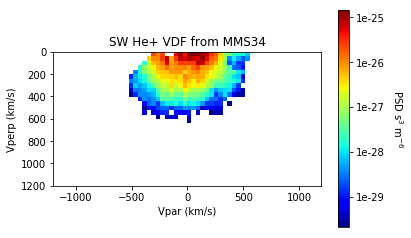

In [95]:
### Create figure window and axes object
f = plt.figure()
ax = f.add_subplot(111)

### Choose colormap a
cmap = mcm.jet
#cmap = mcm.ocean
#cmap = mcm.flag
#cmap = mcm.rainbow

### Set the masked values to appear as a specific color
cmap.set_bad('white',1.)
#cmap.set_bad('black',1.)
#cmap.set_bad('green',1.)

### Provide labels for the image and axes 
ax.set_title('SW He+ VDF from MMS34')
ax.set_ylabel('Vperp (km/s)')
ax.set_xlabel('Vpar (km/s)')

### Show the image and set axes ranges
plt.imshow(masked_log_array,interpolation = 'nearest', cmap=cmap,extent = [-1200,1200,1200,0])

### Create and format colorbar
cbar = plt.colorbar(orientation='vertical')
cbar.ax.set_yticklabels(cbar_labels)
cbar.set_label('PSD s$^3$ m$^{-6}$',rotation = 270,labelpad = 20)




/Users/mstarkey/anaconda/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


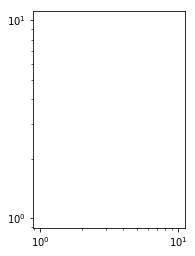

In [108]:
### Create perpendicular and parallel slices of the distribution for plotting purposes
xperp = np.linspace(20.,1180.,30)
xpar = np.linspace(-1180.,1180.,60)
Vperp = vdf.sum(axis=1)
Vpar = vdf.sum(axis=0)

# Normalize the velocities to solar wind speed (330 km/s)
xpar = xpar/330
xperp = xperp/330

### Plot parallel f(Vpar)
fig_par = plt.figure()
ax_par = fig_par.add_subplot(121)
fig_par = plt.loglog(xpar,Vpar)
#ax_par.set_title('f(Vpar)')
#ax_par.set_ylabel('PSD s$^3$ m$^{-6}$')
#ax_par.set_xlabel(r'$\frac{V_{par} - V_{SW}}{V_{SW}}$')

### Plot parallel f(Vperp)
fig_perp = plt.figure()
ax_perp = fig_perp.add_subplot(121)
fig_perp = plt.loglog(xperp,Vperp)
ax_perp.set_title('f(Vperp)')
ax_perp.set_ylabel('PSD s$^3$ m$^{-6}$')
ax_perp.set_xlabel(r'$\frac{V_{perp} - V_{SW}}{V_{SW}}$')






In [69]:
fig_perp = plt.figure()
ax_perp = fig_perp.add_subplot(121)
fig_perp = plt.loglog(xperp,Vperp)
ax_perp.set_title('f(Vperp)')
ax_perp.set_ylabel('PSD s$^3$ m$^{-6}$')
ax_perp.set_xlabel(r'$\frac{V_{perp} - V_{SW}}{V_{SW}}$')





array([-3.57575758, -3.45454545, -3.33333333, -3.21212121, -3.09090909,
       -2.96969697, -2.84848485, -2.72727273, -2.60606061, -2.48484848,
       -2.36363636, -2.24242424, -2.12121212, -2.        , -1.87878788,
       -1.75757576, -1.63636364, -1.51515152, -1.39393939, -1.27272727,
       -1.15151515, -1.03030303, -0.90909091, -0.78787879, -0.66666667,
       -0.54545455, -0.42424242, -0.3030303 , -0.18181818, -0.06060606,
        0.06060606,  0.18181818,  0.3030303 ,  0.42424242,  0.54545455,
        0.66666667,  0.78787879,  0.90909091,  1.03030303,  1.15151515,
        1.27272727,  1.39393939,  1.51515152,  1.63636364,  1.75757576,
        1.87878788,  2.        ,  2.12121212,  2.24242424,  2.36363636,
        2.48484848,  2.60606061,  2.72727273,  2.84848485,  2.96969697,
        3.09090909,  3.21212121,  3.33333333,  3.45454545,  3.57575758])

In [110]:
len(xpar)

60

In [50]:
xpar = xpar/330.
xpar

array([-0.01083563, -0.01046832, -0.01010101, -0.0097337 , -0.00936639,
       -0.00899908, -0.00863177, -0.00826446, -0.00789715, -0.00752984,
       -0.00716253, -0.00679522, -0.00642792, -0.00606061, -0.0056933 ,
       -0.00532599, -0.00495868, -0.00459137, -0.00422406, -0.00385675,
       -0.00348944, -0.00312213, -0.00275482, -0.00238751, -0.0020202 ,
       -0.00165289, -0.00128558, -0.00091827, -0.00055096, -0.00018365,
        0.00018365,  0.00055096,  0.00091827,  0.00128558,  0.00165289,
        0.0020202 ,  0.00238751,  0.00275482,  0.00312213,  0.00348944,
        0.00385675,  0.00422406,  0.00459137,  0.00495868,  0.00532599,
        0.0056933 ,  0.00606061,  0.00642792,  0.00679522,  0.00716253,
        0.00752984,  0.00789715,  0.00826446,  0.00863177,  0.00899908,
        0.00936639,  0.0097337 ,  0.01010101,  0.01046832,  0.01083563])

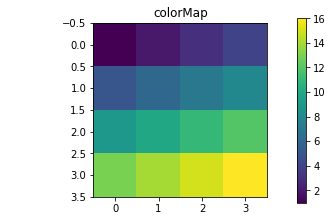

In [193]:
import numpy as np
import matplotlib.pyplot as plt

H = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])  # added some commas and array creation code

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()
